Running R codes here seems to be a bitch.
To use R codes here, install rpy2 using `mamba install rpy2`

I already have an R project with "renv" that I want to use.

In [1]:
import os

# Set R_LIBS before importing rpy2
renv_library_path = "/home/momo/R/Projects/ABCA/renv/library/linux-ubuntu-jammy/R-4.4"
os.environ["R_LIBS"] = renv_library_path
os.environ["R_HOME"] = "/home/momo/R/Projects/ABCA/renv/library/linux-ubuntu-jammy/R-4.4"

# Import rpy2.robjects after setting the environment
import rpy2.robjects as ro

# Explicitly reset .libPaths() in R
ro.r(f'.libPaths(c("{renv_library_path}"))')

# Verify the R version and library paths
print(ro.r('R.version.string'))
print(ro.r('.libPaths()'))

Unable to determine R library path: [Errno 2] No such file or directory: '/home/momo/R/Projects/ABCA/renv/library/linux-ubuntu-jammy/R-4.4/bin/Rscript'


: 

In [3]:
import os
import rpy2.robjects as ro
%load_ext rpy2.ipython

In [9]:
%%R
library(renv)
setwd("/home/momo/R/Projects/ABCA/")
renv::activate()

R[write to console]: Error in library(renv) : there is no package called ‘renv’




Error in library(renv) : there is no package called ‘renv’


RInterpreterError: Failed to parse and evaluate line 'library(renv)\nsetwd("/home/momo/R/Projects/ABCA/")\nrenv::activate()\n'.
R error message: 'Error in library(renv) : there is no package called ‘renv’'

In [2]:
print(ro.r('R.home()'))

[1] "/home/momo/miniforge3/envs/abca-env/lib/R"



In [3]:
# Activate renv within the R session
ro.r(f'''
library(renv)
renv::activate("{'/home/momo/R/Projects/ABCA'}")
''')

R[write to console]: Error in library(renv) : there is no package called ‘renv’



RRuntimeError: Error in library(renv) : there is no package called ‘renv’


In [12]:
# expr_path = '/data/scRNA/ABCA/AIBS/AWS/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-CTXsp-log2-wmeta.h5ad'
expr_path = '/data/scRNA/ABCA/AIBS/AWS/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-Isocortex-1-log2-wmeta.h5ad'
adata = sc.read_h5ad(expr_path)
adata

AnnData object with n_obs × n_vars = 227670 × 32285
    obs: 'cell_barcode', 'barcoded_cell_sample_label', 'library_label', 'feature_matrix_label', 'entity', 'brain_section_label', 'library_method', 'region_of_interest_acronym', 'donor_label', 'donor_genotype', 'donor_sex', 'dataset_label', 'x', 'y', 'cluster_alias', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color', 'class_color', 'subclass_color', 'supertype_color', 'cluster_color', 'region_of_interest_order', 'region_of_interest_color'
    var: 'gene_symbol'

In [13]:
def print_column_info(df):
    for c in df.columns:
        # Explicitly set observed=False to retain current behavior and suppress the warning
        grouped = df[[c]].groupby(c, observed=False).count()
        members = ''
        if len(grouped) < 30:
            members = str(list(grouped.index))
        print(f"Number of unique {c} = {len(grouped)} {members}")


In [14]:
print_column_info(adata.obs)

Number of unique cell_barcode = 220576 
Number of unique barcoded_cell_sample_label = 68 
Number of unique library_label = 68 
Number of unique feature_matrix_label = 1 ['WMB-10Xv3-Isocortex-1']
Number of unique entity = 1 ['cell']
Number of unique brain_section_label = 0 []
Number of unique library_method = 1 ['10Xv3']
Number of unique region_of_interest_acronym = 10 ['ACA', 'AI', 'AUD-TEa-PERI-ECT', 'MO-FRP', 'MOp', 'PL-ILA-ORB', 'RSP', 'SS-GU-VISC', 'VIS', 'VIS-PTLp']
Number of unique donor_label = 36 
Number of unique donor_genotype = 2 ['Ai14(RCL-tdT)/wt', 'Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt']
Number of unique donor_sex = 2 ['F', 'M']
Number of unique dataset_label = 1 ['WMB-10Xv3']
Number of unique x = 226998 
Number of unique y = 227247 
Number of unique cluster_alias = 677 
Number of unique neurotransmitter = 8 ['Chol', 'Dopa', 'GABA', 'GABA-Glyc', 'Glut', 'Glut-GABA', 'Hist', 'Nora']
Number of unique class = 24 ['01 IT-ET Glut', '02 NP-CT-L6b Glut', '03 OB-CR Glut', '04 DG-I

In [15]:
def plot_umap(xx, yy, cc=None, val=None, fig_width=8, fig_height=8, cmap=None):

    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)
    
    if cmap is not None :
        plt.scatter(xx, yy, s=0.5, c=val, marker='.', cmap=cmap)
    elif cc is not None :
        plt.scatter(xx, yy, s=0.5, color=cc, marker='.')
        
    ax.axis('equal')
    ax.set_xlim(-18, 27)
    ax.set_ylim(-18, 27)
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig, ax

In [16]:
cell_subsampled = adata.obs
print(len(cell_subsampled))

227670


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


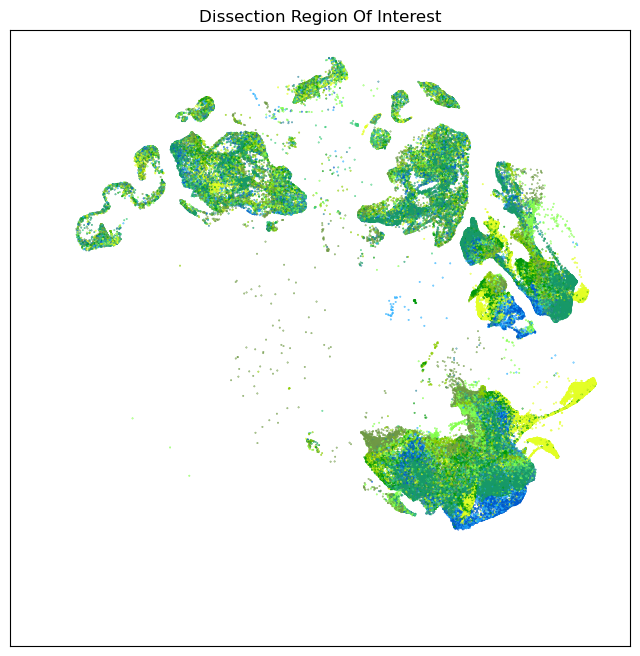

In [17]:
fig, ax = plot_umap(cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['region_of_interest_color'])
res = ax.set_title("Dissection Region Of Interest")
plt.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


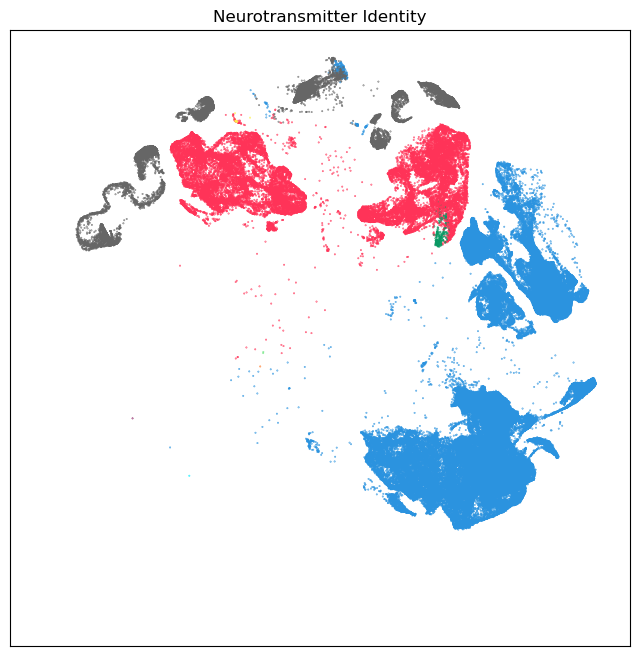

In [18]:
fig, ax = plot_umap(cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['neurotransmitter_color'])
res = ax.set_title("Neurotransmitter Identity")
plt.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


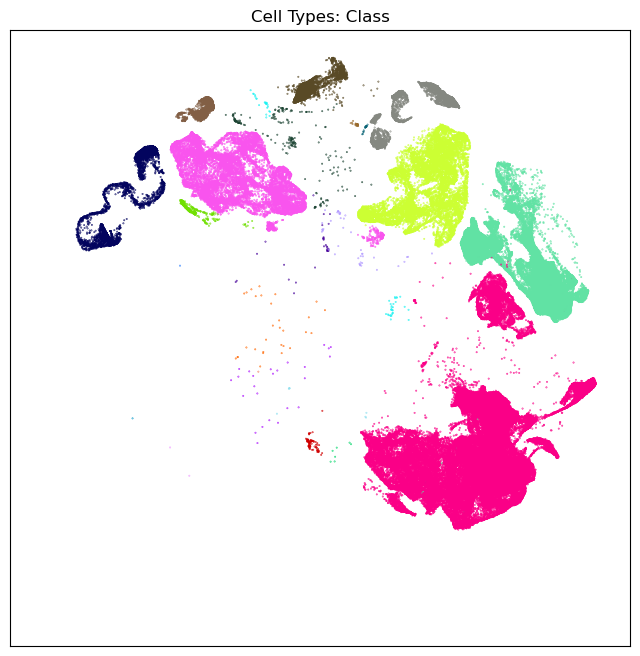

In [19]:
fig, ax = plot_umap(cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['class_color'])
res = ax.set_title("Cell Types: Class")
plt.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


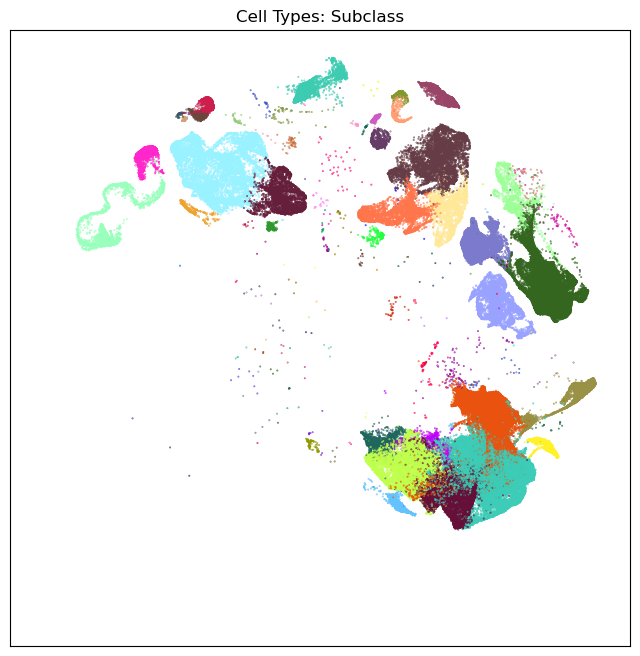

In [20]:
fig, ax = plot_umap(cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['subclass_color'])
res = ax.set_title("Cell Types: Subclass")
plt.show()